In [33]:
import json
import requests
import geopandas as gpd
from shapely.geometry import shape
import io
import os

import numpy as np
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

import pandas as pd
from pandas import DataFrame

import matplotlib.pylab as plt

%matplotlib inline

import urllib.request
import gzip
import pylab as pl

import shapely
from shapely.geometry import Point
from fiona.crs import from_epsg
from geopandas.tools import sjoin
import pysal as ps

In [41]:
url = 'https://data.cityofnewyork.us/resource/67g2-p84d.json'

In [42]:
r = requests.get(url)
r.raise_for_status()

data = r.json()
for d in data:
    d['the_geom'] = shape(d['the_geom'])

gdf = gpd.GeoDataFrame(data).set_geometry('the_geom')
gdf.head()

,address,addressnum,agencyjuri,area,areatype,bbl,bin,boro,borocode,capacity,...,proptype,streetname,the_geom,uid,uid_merged,util,utilrate,xcoord,ycoord,zipcode
0,433 Beach 40 Street,433,NaN,NaN,NaN,4159600060,4302142,Queens,4,NaN,...,NaN,Beach 40 Street,POINT (-73.77315163304799 40.59637575834261),-2556,NaN,NaN,NaN,1047247.925,156636.8749,11691
1,1149 Eastern Parkway,1149,NaN,NaN,NaN,3013910066,3037379,Brooklyn,3,NaN,...,NaN,Eastern Parkway,POINT (-73.93018657840112 40.66918474950047),10940,NaN,NaN,NaN,1003616.489,183088.9919,11213
2,46 West 16 Street,46,NaN,NaN,NaN,1008170080,1015316,Manhattan,1,NaN,...,NaN,West 16 Street,POINT (-73.99527655339523 40.73804173828078),10815,NaN,NaN,NaN,985558.693,208168.0909,10011
3,21-23 Birdsall Avenue,21-23,NaN,NaN,NaN,4155270015,4297844,Queens,4,NaN,...,NaN,Birdsall Avenue,POINT (-73.75395863856446 40.60693975559958),11204,NaN,NaN,NaN,1052567.3287,160499.6989,11691
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx,2,NaN,...,NaN,NaN,POINT (-73.88436458378895 40.82287771779178),13644,NaN,NaN,NaN,1016254.1164,239097.8932,0


In [45]:
gdf.columns

Index(['address', 'addressnum', 'agencyjuri', 'area', 'areatype', 'bbl', 'bin',
       'boro', 'borocode', 'capacity', 'captype', 'censtract', 'city',
       'commboard', 'council', 'datadate', 'dataname', 'datasource', 'dataurl',
       'facdomain', 'facgroup', 'facname', 'facsubgrp', 'factype', 'idagency',
       'idold', 'latitude', 'longitude', 'nta', 'opabbrev', 'opname', 'optype',
       'overabbrev', 'overagency', 'overlevel', 'pgtable', 'proptype',
       'streetname', 'the_geom', 'uid', 'uid_merged', 'util', 'utilrate',
       'xcoord', 'ycoord', 'zipcode'],
      dtype='object')

In [49]:
facilities = gdf.drop(['addressnum', 'agencyjuri', 'area', 'areatype', 'bbl', 'bin',
       'borocode', 'capacity', 'captype', 'city', 'commboard', 'council', 'datadate', 
       'dataname', 'datasource', 'dataurl',
       'facdomain', 'facgroup', 'facname', 'idagency',
       'idold',  'nta', 'opabbrev', 'opname', 'optype',
       'overabbrev', 'overagency', 'overlevel', 'pgtable', 'proptype',
       'streetname', 'uid', 'uid_merged', 'util', 'utilrate',
       'xcoord', 'ycoord', 'zipcode'], axis=1)
facilities

,address,boro,censtract,facsubgrp,factype,latitude,longitude,the_geom
0,433 Beach 40 Street,Queens,97203,Child Nutrition,Summer Only Feeding Site,40.596384,-73.773153,POINT (-73.77315163304799 40.59637575834261)
1,1149 Eastern Parkway,Brooklyn,34900,Soup Kitchens and Food Pantries,Food Pantry,40.669193,-73.930188,POINT (-73.93018657840112 40.66918474950047)
2,46 West 16 Street,Manhattan,5400,Soup Kitchens and Food Pantries,Food Pantry,40.73805,-73.995278,POINT (-73.99527655339523 40.73804173828078)
3,21-23 Birdsall Avenue,Queens,103201,Soup Kitchens and Food Pantries,Food Pantry,40.606948,-73.75396,POINT (-73.75395863856446 40.60693975559958)
4,NaN,Bronx,11502,Other Transportation,Bridge House,40.822886,-73.884366,POINT (-73.88436458378895 40.82287771779178)
5,1411 Broadway,Manhattan,11300,Privately Owned Public Space,Privately Owned Public Space,40.754211,-73.987567,POINT (-73.98756555488431 40.75420273484566)
6,290 East 3 Street,Manhattan,2202,Permanent Supportive SRO Housing,Supportive Housing,40.72117,-73.979855,POINT (-73.97985355935744 40.72116174104648)
7,47-01 48 Street,Queens,21900,Solid Waste Transfer and Carting,DSNY Garage,40.720555,-73.922521,POINT (-73.92251957775713 40.72054673915938)
8,1695 Washington Avenue,Bronx,16500,Soup Kitchens and Food Pantries,Food Pantry,40.842209,-73.901134,POINT (-73.90113257723924 40.84220071460207)
9,358 St Marks Place,Staten Is,300,"Preventative Care, Evaluation Services, and Re...",Specialized Teen Preventive Services,40.640995,-74.078054,POINT (-74.07805253278202 40.6409867602144)


In [55]:
fire_house = facilities[(facilities.factype == 'Firehouse')]
fire_house.head()

,address,boro,censtract,facsubgrp,factype,latitude,longitude,the_geom
26,18 Ralph Avenue,Brooklyn,38700,Fire Services,Firehouse,40.689602,-73.924399,POINT (-73.92439757902427 40.68959374529405)
119,1338 60 Street,Brooklyn,19200,Fire Services,Firehouse,40.628025,-73.997741,POINT (-73.99773955926062 40.62801675994461)
320,254-20 Union Turnpike,Queens,157902,Fire Services,Firehouse,40.744475,-73.716086,POINT (-73.7160846424768 40.74446672727873)
458,1454 Astor Avenue,Bronx,31400,Fire Services,Firehouse,40.859346,-73.844165,POINT (-73.84416359446878 40.85933770925855)
501,2175 Walton Avenue,Bronx,23900,Fire Services,Firehouse,40.856228,-73.904403,POINT (-73.9044015753386 40.85621971197767)


In [61]:
r = requests.get("https://data.cityofnewyork.us/resource/ith2-q832.json")
r.raise_for_status()

data = r.json()
for d in data:
    d['the_geom'] = shape(d['the_geom'])

PUMA = gpd.GeoDataFrame(data).set_geometry('the_geom')
PUMA.head()

,puma,shape_area,shape_leng,the_geom
0,3701,97928517.7258,53227.1444612,(POLYGON ((-73.89641133483133 40.9045045208202...
1,3702,188986042.978,106050.002302,(POLYGON ((-73.8442314689986 40.86942035096838...
2,3703,267013740.076,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,106212853.306,47970.9012768,(POLYGON ((-73.84792614069238 40.8713422330779...
4,4015,81054382.1573,50007.4154926,(POLYGON ((-73.95374853778468 40.6385863375854...


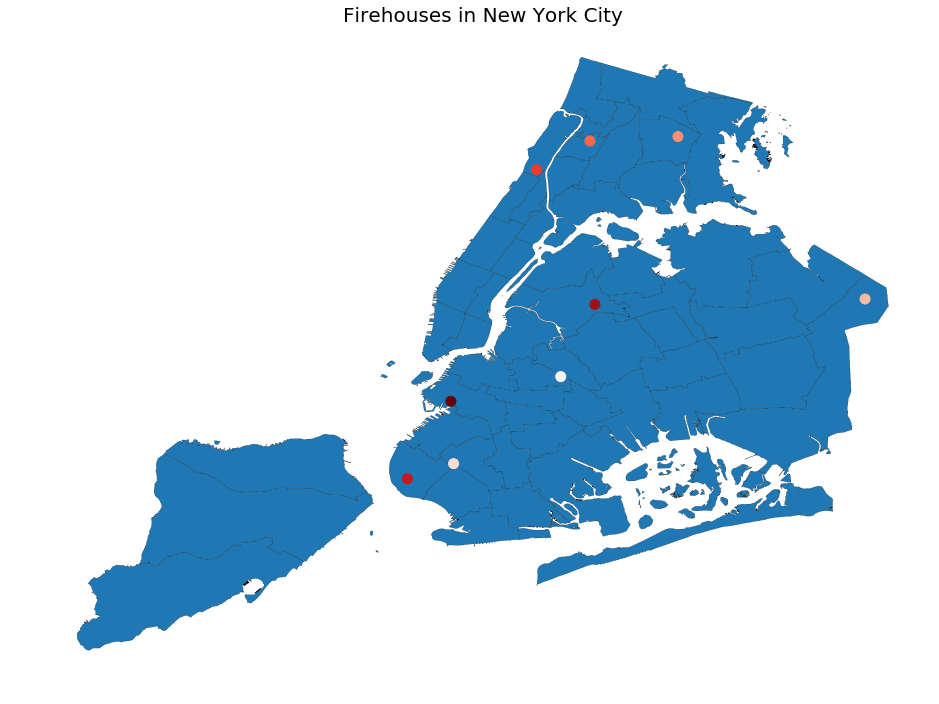

In [73]:
ax = pl.figure(figsize=(16, 12)).add_subplot(111)

PUMA.plot(ax=ax, scheme='Equal_interval', k=4, edgecolor='k', legend=True, lw=0.2)

fire_house.plot(ax=ax, cmap='Reds', markersize=100)
ax.set_title('Firehouses in New York City',size=20)
ax.axis('off');